
# PROJECT : Credit Card Fraud Detection 

In [1]:
# Using Jupyter Notebook for ML classification code, applying various built-in libraries and functions in Python
# PROJECT Title: Credit Card Fraud Detection
# Fraud is a financial attack issue that occurs in many fields, including personal credit cards
# Detecting whether a credit card transaction is fraudulent or not based on various features of the transaction


"For more information, the last cell contains a detailed description."

'For more information, the last cell contains a detailed description.'

In [2]:
# The DATASET is sourced from Kaggle
# Kaggle Project: Detecting Fraudulent Transactions in Credit Cards
# Link: https://www.kaggle.com/code/raghav3570/detecting-fraudulent-transactions-in-credit-card/notebook
# Reading two CSV files and then concatenating them into one file (as they are already split on Kaggle)
import numpy as np 
import pandas as pd
dataset1 = pd.read_csv('fraudTrain.csv')
dataset2 = pd.read_csv('fraudTest.csv')
dataset = pd.concat([dataset1, dataset2], ignore_index=True, sort=False)
dataset.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [3]:
# To perform preprocessing, we need to know the dataset dimensions
# The output shows that the dataset has nearly 1 million instances
# The dataset also contains 23 features
dataset.shape

(1852394, 23)

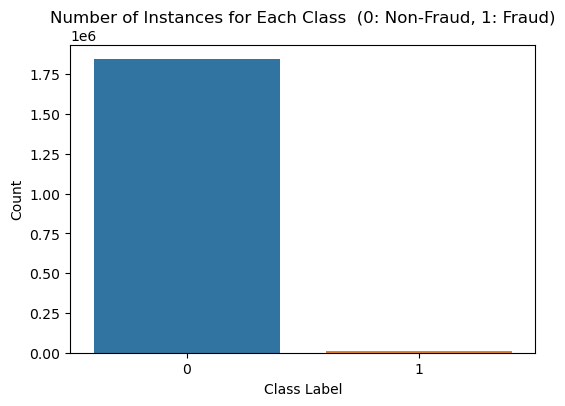

In [4]:
#we have 2 class 0: Non-Fraud, 1: Fraud
# This figure shows the distribution of each class
# We observe that the classes are imbalanced
# There is a significant difference between the classes distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=dataset )  
plt.title("Number of Instances for Each Class  (0: Non-Fraud, 1: Fraud)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [5]:
# The first approach to address the imbalance is to decrease the number of instances in class (0: Non-Fraud) 
# This will match the number of instances in class (1: Fraud) using sampling technique
num_fraud_cases = dataset['is_fraud'].value_counts()[1]
class_0_sample = dataset[dataset['is_fraud'] == 0].sample(num_fraud_cases, random_state=42)
dataset = pd.concat([class_0_sample, dataset[dataset['is_fraud'] == 1]])
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
print(dataset['is_fraud'].value_counts())

is_fraud
1    9651
0    9651
Name: count, dtype: int64


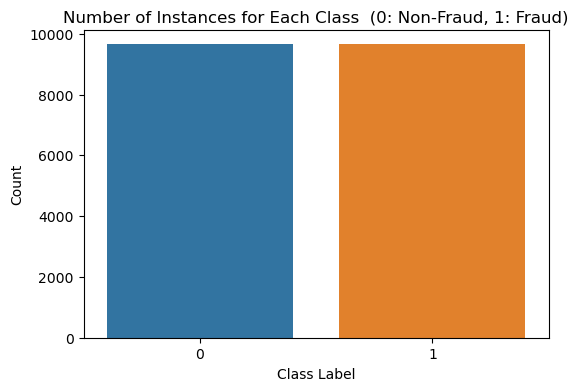

In [6]:
#the figure show the class after matching 

plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=dataset ) 
plt.title("Number of Instances for Each Class  (0: Non-Fraud, 1: Fraud)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [7]:
# After balancing the classes, we will begin dropping some unnecessary features
# The features with names 'first' and 'last' are not useful for our analysis


dataset=dataset.drop(['first','last'],axis=1)
dataset.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,90072,2019-02-23 01:49:18,6011504998544485,fraud_Torphy-Goyette,shopping_pos,1069.04,F,4038 Smith Avenue,Jones,AL,...,32.5104,-86.8138,1089,Materials engineer,1971-11-02,e76330ed3fa261d1483617da75edb200,1329961758,33.223426,-87.809106,1
1,1000983,2020-02-15 02:30:12,30235438713303,fraud_Durgan-Auer,misc_net,750.98,M,3603 Mitchell Court,Winfield,WV,...,38.5072,-81.8900,5512,Exhibition designer,1980-03-24,e21fba3f053af7ea0bd31dfed1ddf2e4,1360895412,37.557927,-81.170028,1


In [8]:
# We have the ['trans_date_trans_time'] feature, which is a string containing the date and time
# We will replace it with a new feature ['year'], created by extracting the year from the string


dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])
dataset['year'] = dataset['trans_date_trans_time'].dt.year
dataset = dataset.drop("trans_date_trans_time", axis=1)
dataset.head(1)

,Unnamed: 0,cc_num,merchant,category,amt,gender,street,city,state,zip,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year
0,90072,6011504998544485,fraud_Torphy-Goyette,shopping_pos,1069.04,F,4038 Smith Avenue,Jones,AL,36749,...,-86.8138,1089,Materials engineer,1971-11-02,e76330ed3fa261d1483617da75edb200,1329961758,33.223426,-87.809106,1,2019


In [9]:
# Display the information of the features using the tabulate library
from tabulate import tabulate
print(tabulate(dataset.info(), headers='keys', tablefmt='psql'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19302 entries, 0 to 19301
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19302 non-null  int64  
 1   cc_num      19302 non-null  int64  
 2   merchant    19302 non-null  object 
 3   category    19302 non-null  object 
 4   amt         19302 non-null  float64
 5   gender      19302 non-null  object 
 6   street      19302 non-null  object 
 7   city        19302 non-null  object 
 8   state       19302 non-null  object 
 9   zip         19302 non-null  int64  
 10  lat         19302 non-null  float64
 11  long        19302 non-null  float64
 12  city_pop    19302 non-null  int64  
 13  job         19302 non-null  object 
 14  dob         19302 non-null  object 
 15  trans_num   19302 non-null  object 
 16  unix_time   19302 non-null  int64  
 17  merch_lat   19302 non-null  float64
 18  merch_long  19302 non-null  float64
 19  is_fraud    19302 non-nul

In [10]:
# We observe that many features are of object type
# To facilitate dropping, we need to encode them using LabelEncoder
# LabelEncoder: A method used to convert categorical labels into numerical values. Each unique category is assigned a unique integer, allowing algorithms to work with the data.
# we use the hotEncoder , since there are fwe features that continous it is not effective
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for col in dataset.select_dtypes(['object']):
    dataset[col] = le.fit_transform(dataset[col])





In [11]:
#the data after Encoding
dataset.head(2)

,Unnamed: 0,cc_num,merchant,category,amt,gender,street,city,state,zip,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year
0,90072,6011504998544485,627,12,1069.04,0,420,394,1,36749,...,-86.8138,1089,287,497,17491,1329961758,33.223426,-87.809106,1,2019
1,1000983,30235438713303,149,8,750.98,1,375,894,49,25213,...,-81.8900,5512,188,646,17107,1360895412,37.557927,-81.170028,1,2020


In [12]:
# Split the data into training and testing sets without including the class labels
#80% train - 20% test
X = dataset.drop('is_fraud',axis=1)
y = dataset['is_fraud']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dataset.head(3)


,Unnamed: 0,cc_num,merchant,category,amt,gender,street,city,state,zip,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year
0,90072,6011504998544485,627,12,1069.04,0,420,394,1,36749,...,-86.8138,1089,287,497,17491,1329961758,33.223426,-87.809106,1,2019
1,1000983,30235438713303,149,8,750.98,1,375,894,49,25213,...,-81.8900,5512,188,646,17107,1360895412,37.557927,-81.170028,1,2020
2,373179,2248348993063230,20,4,309.97,0,392,683,35,44265,...,-81.2977,51,288,283,12906,1340322004,40.478023,-80.903071,1,2019


In [13]:
# Scaling to normalizing or standardizing numerical features so they have a similar range

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Showing the variance of each feature to confirm they are different from one another, that help in next step

print(X.var())

Unnamed: 0    1.446884e+11
cc_num        1.655916e+36
merchant      3.870557e+04
category      1.502162e+01
amt           1.411299e+05
gender        2.491682e-01
street        8.246504e+04
city          6.901640e+04
state         2.046601e+02
zip           7.316895e+08
lat           2.628186e+01
long          1.985777e+02
city_pop      9.112129e+10
job           2.013412e+04
dob           7.810376e+04
trans_num     3.104888e+07
unix_time     3.306122e+14
merch_lat     2.667332e+01
merch_long    1.990127e+02
year          2.496953e-01
dtype: float64


In [15]:
##there are 20 features now , so we want to use the RandomForestClassifier model to present the importance score to each feature 
#on the training dataset
#so it is order the score by their importance 



from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)
feature_importances = rf_model.feature_importances_
original_features = X.columns  
feature_importance_df = pd.DataFrame({
    'Feature': original_features[:len(feature_importances)],
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)




       Feature  Importance
4          amt    0.622716
3     category    0.086909
16   unix_time    0.033077
0   Unnamed: 0    0.026729
14         dob    0.023640
12    city_pop    0.019031
2     merchant    0.017596
18  merch_long    0.017015
17   merch_lat    0.016938
13         job    0.016507
15   trans_num    0.016409
7         city    0.015421
6       street    0.015419
1       cc_num    0.014314
9          zip    0.014094
10         lat    0.013915
11        long    0.013317
8        state    0.009547
5       gender    0.004506
19        year    0.002897


In [16]:

dataset.shape

(19302, 21)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

       Feature  Importance
4          amt    0.622716
3     category    0.086909
16   unix_time    0.033077
0   Unnamed: 0    0.026729
14         dob    0.023640
12    city_pop    0.019031
2     merchant    0.017596
18  merch_long    0.017015
17   merch_lat    0.016938
13         job    0.016507
15   trans_num    0.016409
7         city    0.015421
6       street    0.015419
1       cc_num    0.014314
9          zip    0.014094
10         lat    0.013915
11        long    0.013317
8        state    0.009547
5       gender    0.004506
19        year    0.002897


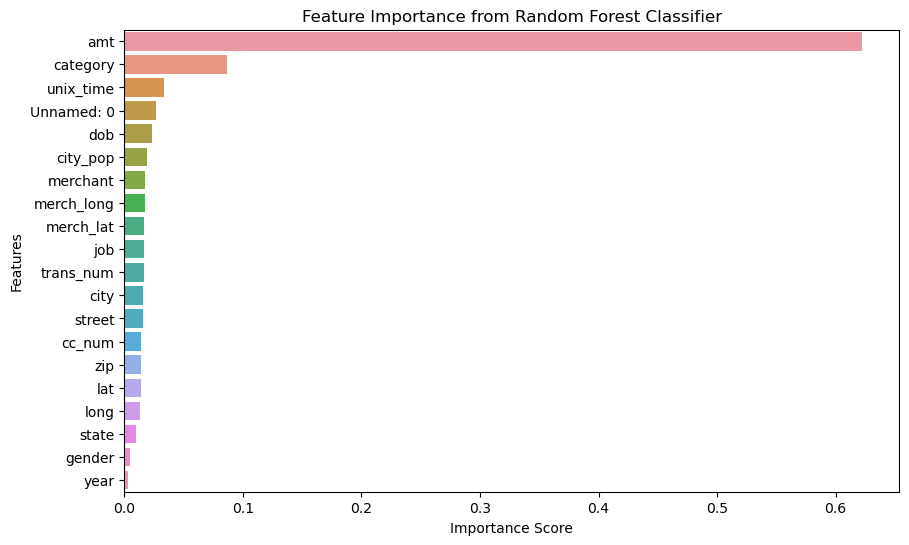

In [18]:
#another way to represent the importance  

features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [19]:
#by observe the importance we drop the least score features

dataset=dataset.drop(['cc_num',"category","gender","street","state","job","dob","long"],axis=1)

In [20]:
# We apply four models, which are:
# 1. Logistic Regression
# 2. Decision Tree Classifier
# 3. Support Vector Classifier (SVC)
# 4. Random Forest Classifier


In [21]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred_LR=lr.predict(X_train_scaled)
y_test_LR=lr.predict(X_test_scaled)
print("test_accuracy",accuracy_score(y_train,y_pred_LR))
print("test_accuracy",accuracy_score(y_test,y_test_LR))
Precision_LR=precision_score(y_test, y_test_LR)
F1_Score_LR=f1_score(y_test, y_test_LR)


test_accuracy 0.855125963344343
test_accuracy 0.8477078477078477


In [22]:
#

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini")
dt.fit(X_train_scaled,y_train)
y_pred_DT=dt.predict(X_train_scaled)
y_test_DT=dt.predict(X_test_scaled)
print("test_accuracy",accuracy_score(y_train,y_pred_DT))
print("test_accuracy",accuracy_score(y_test,y_test_DT))
Precision_DT=precision_score(y_test, y_test_DT)
F1_Score_DT=f1_score(y_test, y_test_DT)

test_accuracy 1.0
test_accuracy 0.9432789432789432


In [23]:
dt=RandomForestClassifier(criterion="gini") 
dt.fit(X_train_scaled,y_train) 
y_pred_RF=dt.predict(X_train_scaled)
y_test_RF=dt.predict(X_test_scaled)
print("test_accuracy",accuracy_score(y_train,y_pred_RF))
print("test_accuracy",accuracy_score(y_test,y_test_RF)) 
Precision_RF=precision_score(y_test, y_test_RF) 
F1_Score_RF=f1_score(y_test, y_test_RF)

test_accuracy 1.0
test_accuracy 0.9518259518259519


In [24]:
#

from sklearn.svm import SVC
dt = SVC(kernel='rbf', class_weight='balanced', random_state=42)  
dt.fit(X_train_scaled,y_train)
y_pred_svm=dt.predict(X_train_scaled)
y_test_svm=dt.predict(X_test_scaled)
print("test_accuracy",accuracy_score(y_train,y_pred_svm))
print("test_accuracy",accuracy_score(y_test,y_test_svm))
Precision_svm=precision_score(y_test, y_test_svm)
F1_Score_svm=f1_score(y_test, y_test_svm)

test_accuracy 0.8719642510200116
test_accuracy 0.8547008547008547


In [25]:
# For each model, we apply three metrics:
# 1. Accuracy
# 2. Precision
# 3. F1 Score



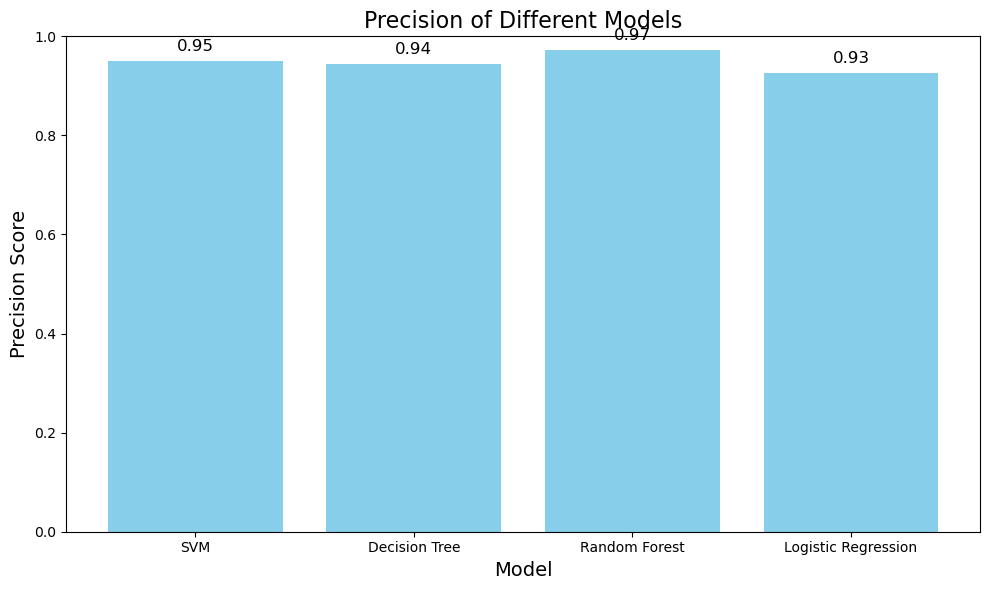

In [26]:
#for precision we observe the Random Forest has the highst score 

precision_data = { 'Model': ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression'],'Precision': [Precision_svm, Precision_DT, Precision_RF, Precision_LR]}
precision_df = pd.DataFrame(precision_data)
plt.figure(figsize=(10, 6))
plt.bar(precision_df['Model'], precision_df['Precision'], color='skyblue')
plt.title('Precision of Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Precision Score', fontsize=14)
plt.ylim(0, 1)  
for index, value in enumerate(precision_df['Precision']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

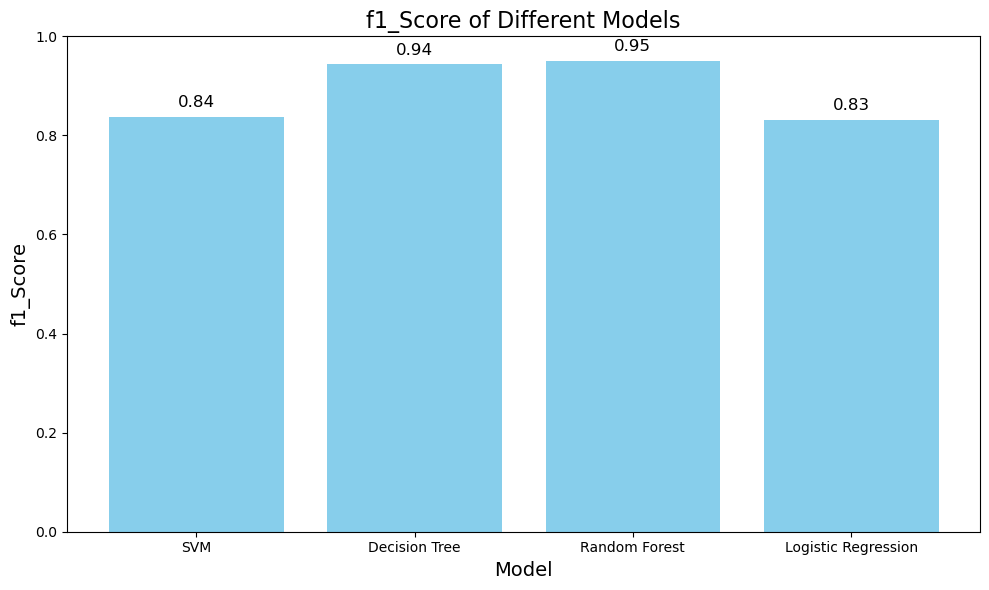

In [27]:
#for F1 score  we observe both  Random Forest and Decision Tree  have  the highst score 


precision_data = {'Model': ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression'],'f1_Score': [F1_Score_svm, F1_Score_DT, F1_Score_RF, F1_Score_LR]}
precision_df = pd.DataFrame(precision_data)
plt.figure(figsize=(10, 6))
plt.bar(precision_df['Model'], precision_df['f1_Score'], color='skyblue')
plt.title('f1_Score of Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('f1_Score', fontsize=14)
plt.ylim(0, 1)  
for index, value in enumerate(precision_df['f1_Score']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

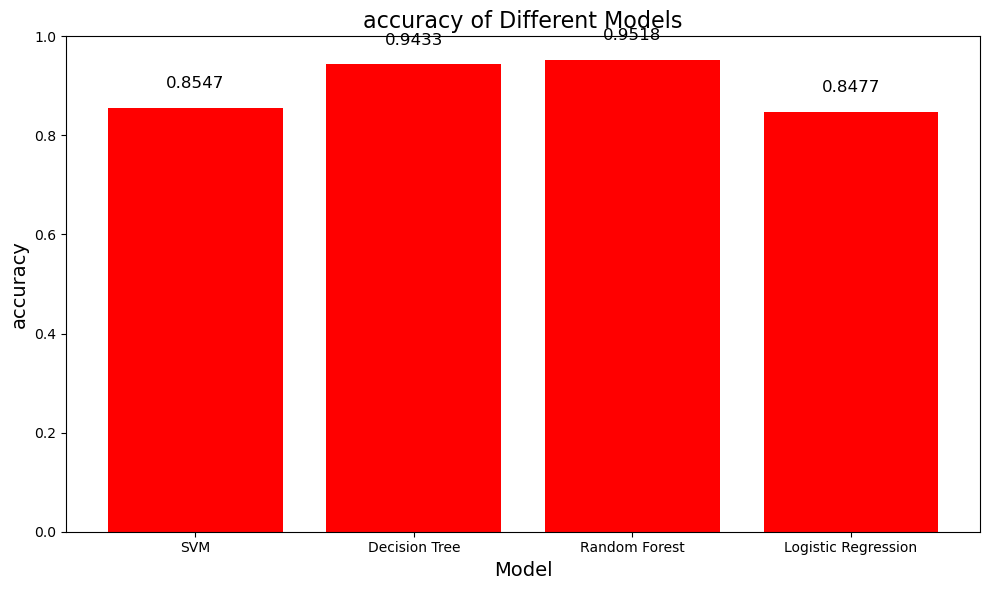

In [28]:
#for accuracy  score  we observe both  Random Forest and Decision Tree  have  the highst score as the F1 score 


precision_data = {'Model': ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression'],'accuracy': [accuracy_score(y_test,y_test_svm), accuracy_score(y_test,y_test_DT), accuracy_score(y_test,y_test_RF), accuracy_score(y_test,y_test_LR)]}
precision_df = pd.DataFrame(precision_data)
plt.figure(figsize=(10, 6))
plt.bar(precision_df['Model'], precision_df['accuracy'], color='red')
plt.title('accuracy of Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.ylim(0, 1)  
for index, value in enumerate(precision_df['accuracy']):
    plt.text(index, value + 0.04, f'{value:.4f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

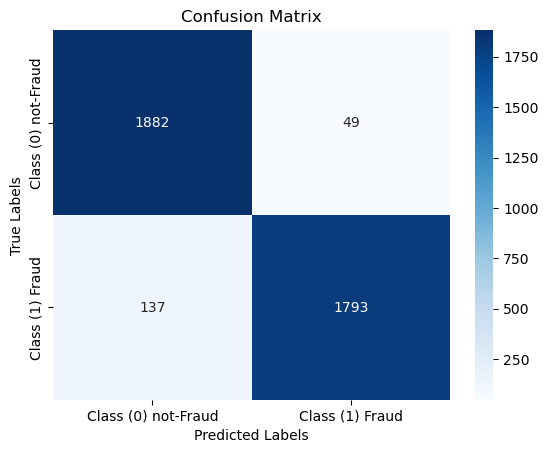

In [29]:
# Create confusion matrix on the (Random forest)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
length = np.minimum(len(y_test), len(y_test_RF))
y_test = y_test[:length]
y_test_RF = y_test_RF[:length]
cm = confusion_matrix(y_test, y_test_RF)
class_labels = ['Class (0) not-Fraud', 'Class (1) Fraud']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# # we observe the Logistic Regression  has the lowes score so we do some enhancment 
#1-Cross validation 
#2-#Enhancement: Hyperparameter Tuning via Grid Search


In [31]:
# cross -validation (accuracy)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')  
print("Mean Accuracy Score:", scores.mean())



Mean Accuracy Score: 0.8547368482849892


In [32]:
#Hyperparameter Tuning via Grid Search (acuracy)
# Optimize model performance by systematically searching for the best hyperparameters using cross-validation.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('lr', LogisticRegression()) ]) 
     
param_grid = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'lr__penalty': ['l2'], 
}
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Mean Accuracy Score:", grid.best_score_)


Best Mean Accuracy Score: 0.8553199385417418


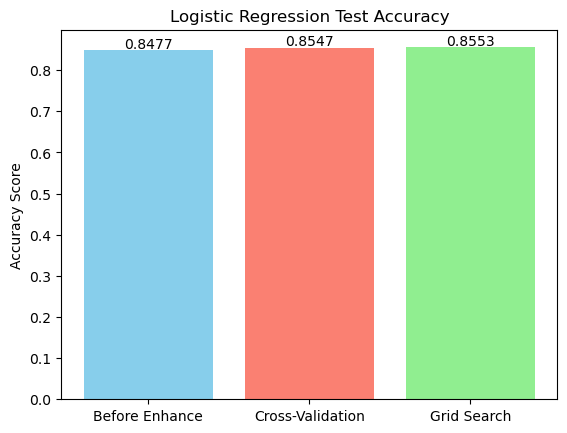

In [33]:
import matplotlib.pyplot as plt

accuracy_scores = [
    accuracy_score(y_test, y_test_LR),
    scores.mean(),
    grid.best_score_
]
labels = ['Before Enhance', 'Cross-Validation', 'Grid Search']

plt.bar(labels, accuracy_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Logistic Regression Test Accuracy')
plt.ylabel('Accuracy Score')

for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.005, f"{score:.4f}", ha='center')

plt.show()



Fraud detection in credit card transactions is a major challenge faced by financial institutions. The goal is to identify fraudulent transactions (unauthorized or malicious activity) while minimizing disruption to legitimate users.

Credit card fraud typically involves unauthorized usage of a credit card to make purchases or withdraw money. This problem is critical because financial losses can be substantial for both the cardholders and the credit card companies.

To solve this problem, we use binary classification—a machine learning approach where the task is to classify each transaction as either:

Fraudulent (1): The transaction is flagged as fraud.
Non-Fraudulent (0): The transaction is considered legitimate.
Dataset:
For this project, we use a credit card fraud detection dataset from Kaggle. The dataset contains transactions made by European cardholders, with features that have been anonymized for privacy reasons. It includes thousands of transactions, and each one is labeled as either fraud or non-fraud. The challenge with this dataset is its imbalance: only a small fraction of the transactions are fraudulent.
kaggle-->Detecting Fraudulent Transactions in Credit Card
 
https://www.kaggle.com/code/raghav3570/detecting-fraudulent-transactions-in-credit-card/notebook
Key Challenges:
Imbalanced Data: Fraudulent transactions are very rare compared to legitimate ones, leading to highly imbalanced datasets. This makes it difficult for traditional machine learning models to detect fraud effectively.

Real-Time Detection: Fraud detection systems must operate quickly to prevent fraud from occurring or limit the damage.

Evolving Fraud Patterns: Fraudsters constantly change their tactics, so models must be able to adapt to new fraud patterns.

Techniques:
Machine Learning Models: Models like Logistic Regression, Decision Trees, Random Forest, and Support Vector Machines (SVM) are commonly used to classify transactions as fraudulent or not.
Evaluation Metrics: Since the dataset is imbalanced, metrics like precision, , and F1-score are more important than accuracy, which can be misleading in such cases

# for additional 

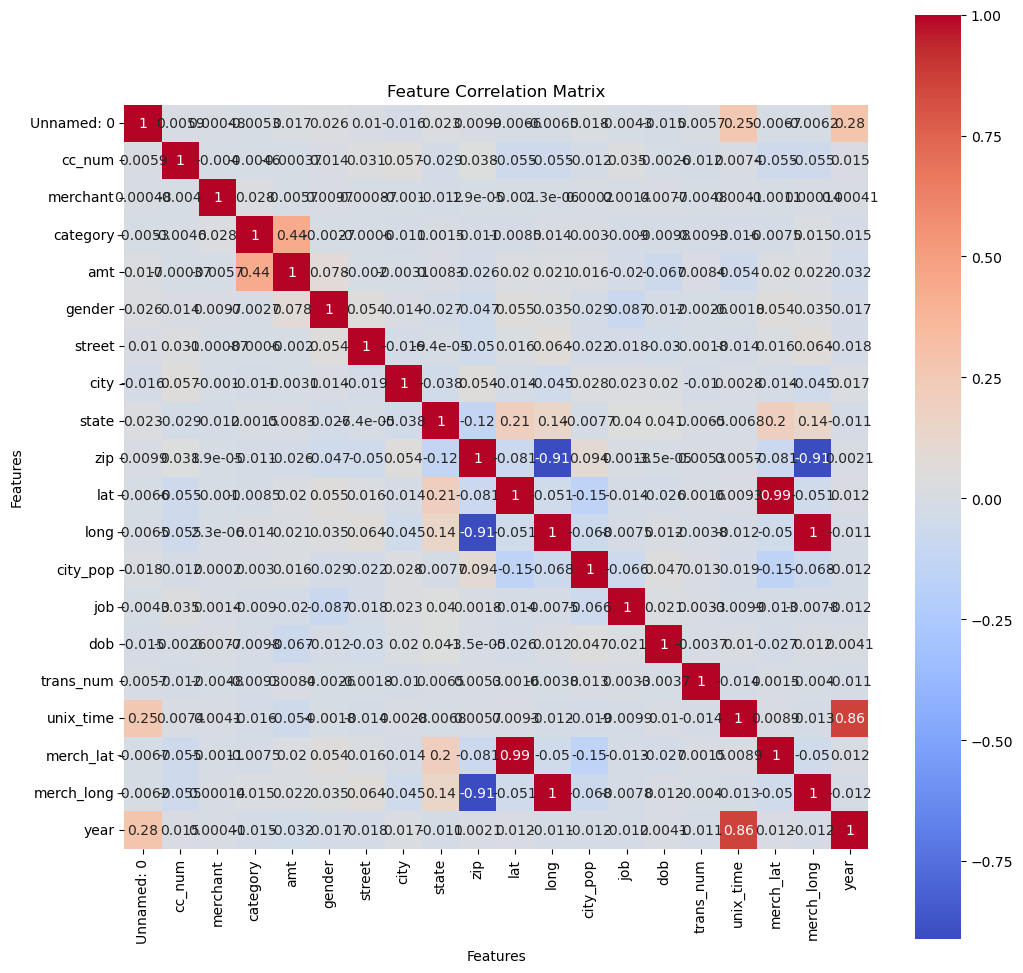

In [34]:
# visual the features to observe wich is more effective


import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = X.corr()
corr_matrix_subset = corr_matrix.iloc[:38, :38]
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [35]:
#an alternative way to address the balancing issue is to use the Logistic Regression model.

from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(class_weight='balanced')
logreg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')